In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
plt.rcParams["figure.figsize"] = (16,4)

# Datos

In [3]:
#data = pd.read_excel("../data/Base.xlsx", parse_dates=True)

In [4]:
#data.to_csv("../data/Base.csv")

In [14]:
data = pd.read_csv("../data/Base.csv", parse_dates=["Tiempo key", "Fecha de pedido", "Fecha liq"])

In [15]:
data = data.drop(columns=["Unnamed: 0"])

In [7]:
data.head()

,Tiempo key,Nro Factura,Cliente,Categoría,Tipo negocio,Localidad,Dirección,Plaza/Campaña,Producto,Nro pedido,...,U pedidas,Kgs pedidos,Fecha liq,U entregadas,Kilos entregados,Importe bruto,Importe factura,Sucursal,Longitud,Latitud
0,2017-05-29,93315173,2000088700000000000,CLIENTE A5,MAYORISTA,SANTA FE,AV DEL VALLE 7199,PLAZA,907460001001,2736812,...,1,1.250,2017-05-29,1,1.250,231.70,12421.88,SANTA FE,-60.691979,-31.602638
1,2017-06-14,93368453,2000088700000000000,CLIENTE A5,MAYORISTA,SANTA FE,AV DEL VALLE 7199,PLAZA,907460001001,2765668,...,1,1.250,2017-06-14,1,1.250,231.70,19944.84,SANTA FE,-60.691979,-31.602638
2,2017-02-21,93074208,2000088890000000000,CLIENTE A3,SUPERMERCADO,SANTA FE,GRAL.PAZ 5374,PLAZA,907400001001,2546672,...,2,1.464,2017-02-21,2,1.464,324.96,24534.07,SANTA FE,-60.686356,-31.620964
3,2017-05-11,93270490,2000088890000000000,CLIENTE A3,SUPERMERCADO,SANTA FE,GRAL.PAZ 5374,PLAZA,907460001001,2702464,...,1,1.250,2017-05-11,1,1.250,231.70,27204.63,SANTA FE,-60.686356,-31.620964
4,2017-05-24,93309184,2000088890000000000,CLIENTE A3,SUPERMERCADO,SANTA FE,GRAL.PAZ 5374,PLAZA,907460001001,2732609,...,1,1.250,2017-05-24,1,1.250,231.70,16573.12,SANTA FE,-60.686356,-31.620964


In [8]:
data.columns

Index(['Tiempo key', 'Nro Factura', 'Cliente ', 'Categoría ', 'Tipo negocio',
       'Localidad', 'Dirección', 'Plaza/Campaña', 'Producto', 'Nro pedido',
       'Fecha de pedido', 'U pedidas', 'Kgs pedidos', 'Fecha liq',
       'U entregadas', 'Kilos entregados', 'Importe bruto', 'Importe factura',
       'Sucursal', 'Longitud', 'Latitud'],
      dtype='object')

In [9]:
data.columns = ['tiempo', 'nro factura', 'cliente', 'categoria', 'tipo negocio', 
                'localidad', 'direccion', 'plaza/campaña', 'producto', 'nro pedido',
                'fecha pedido', 'u pedidas', 'kg pedidos', 'fecha liq', 'u entregadas', 
                'kg entregados', 'importe bruto', 'importe factura', 'sucursal', 'longitud', 'latitud']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301579 entries, 0 to 301578
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   tiempo           301579 non-null  datetime64[ns]
 1   nro factura      301579 non-null  int64         
 2   cliente          301579 non-null  int64         
 3   categoria        301579 non-null  object        
 4   tipo negocio     301579 non-null  object        
 5   localidad        301579 non-null  object        
 6   direccion        301579 non-null  object        
 7   plaza/campaña    301579 non-null  object        
 8   producto         301579 non-null  int64         
 9   nro pedido       301579 non-null  int64         
 10  fecha pedido     301579 non-null  datetime64[ns]
 11  u pedidas        301579 non-null  int64         
 12  kg pedidos       301579 non-null  float64       
 13  fecha liq        301579 non-null  datetime64[ns]
 14  u entregadas     301

Convertir strings a lowercase y sacarles trailing whitespace.

In [11]:
data.loc[:, data.select_dtypes("object").columns] = data.loc[:, data.select_dtypes("object").columns].applymap(str.lower)
data.loc[:, data.select_dtypes("object").columns] = data.loc[:, data.select_dtypes("object").columns].applymap(str.strip)

In [12]:
data.loc[:, data.select_dtypes("object").columns].head()

,categoria,tipo negocio,localidad,direccion,plaza/campaña,sucursal
0,cliente a5,mayorista,santa fe,av del valle 7199,plaza,santa fe
1,cliente a5,mayorista,santa fe,av del valle 7199,plaza,santa fe
2,cliente a3,supermercado,santa fe,gral.paz 5374,plaza,santa fe
3,cliente a3,supermercado,santa fe,gral.paz 5374,plaza,santa fe
4,cliente a3,supermercado,santa fe,gral.paz 5374,plaza,santa fe


Remover ceros innecesarios en cliente.

In [13]:
data.cliente = data.cliente // 1e10

In [14]:
data.cliente.head()

0    200008870
1    200008870
2    200008889
3    200008889
4    200008889
Name: cliente, dtype: int64

Limpiar categorías.

In [15]:
data.categoria = data.categoria.str.replace("cliente ", "")
data.loc[data.categoria == "sin categoria", "categoria"] = "sc"
data.loc[data.categoria == "z - cnt", "categoria"] = "cnt"
data.loc[data.categoria == "z - horeca", "categoria"] = "horeca"

In [16]:
data.categoria.unique()

array(['a5', 'a3', 'sc', 'a6', 'a7', 'a4', 'cnt', 'horeca', 'a1', 'a2',
       'a0'], dtype=object)

Corregir algunos nombres en columna "tipo negocio".

In [17]:
data.loc[data["tipo negocio"] == "otros tipos de clien", "tipo negocio"] = "otros"
data.loc[data["tipo negocio"] == "autoservicio amarill", "tipo negocio"] = "autoservicio amarillo"
data.loc[data["tipo negocio"] == "centros de distribuc", "tipo negocio"] = "distribucion"

In [18]:
data["tipo negocio"].unique()

array(['mayorista', 'supermercado', 'tradicional', 'autoservicio',
       'otros', 'autoservicio amarillo', 'oficinas', 'institucional',
       'fabricas de alimento', 'kioscos', 'bar publico', 'hipermercado',
       'distribucion', 'gran cadena nacional', 'bar cautivo',
       'red de compras'], dtype=object)

Del producto nos interesan solo los primeros cinco números.

In [19]:
data.producto = data.producto // 1e7
data.producto = data.producto.astype("int64")

In [20]:
data.producto.unique()

array([90746, 90740, 90745, 90739, 44091, 44109, 44143, 44146, 44119,
       44105, 44115, 44087, 44090, 44145, 44118, 44140, 44137, 44088,
       44108, 44116, 44106, 16071, 16100, 16061, 16070, 16091, 16090,
       16081, 16110, 16062, 16101, 16086, 16080, 16087, 44136, 16105,
       16077, 16076, 16075, 44139, 44144, 44138, 44142, 16106, 16034,
       44149, 44158, 44155, 44148, 44150, 44152, 44151, 44154, 44157,
       16120, 16115, 16111, 16121, 16116, 16131, 16136, 16130, 16135,
       44147], dtype=int64)

Revisamos en busca de NA

In [21]:
data.isna().sum()

tiempo                 0
nro factura            0
cliente                0
categoria              0
tipo negocio           0
localidad              0
direccion              0
plaza/campaña          0
producto               0
nro pedido             0
fecha pedido           0
u pedidas              0
kg pedidos             0
fecha liq              0
u entregadas           0
kg entregados          0
importe bruto          0
importe factura        0
sucursal               0
longitud           11627
latitud            11627
dtype: int64

Hay muchas observaciones sin coordenadas GPS. El resto no tiene problemas.

Buscamos duplicados

In [22]:
data.duplicated().sum()

185

In [23]:
data[data.duplicated()].head()

,tiempo,nro factura,cliente,categoria,tipo negocio,localidad,direccion,plaza/campaña,producto,nro pedido,...,u pedidas,kg pedidos,fecha liq,u entregadas,kg entregados,importe bruto,importe factura,sucursal,longitud,latitud
126867,2018-07-14,94349291,200054589,a2,supermercado,general roca,chula vista 831,plaza,16062,3516318,...,5,6.25,2018-07-14,5,6.25,2209.00,84275.28,neuquen,-67.583995,-39.043247
126868,2018-07-14,94349291,200054589,a2,supermercado,general roca,chula vista 831,plaza,16062,3516318,...,5,6.25,2018-07-14,5,6.25,2209.00,84275.28,neuquen,-67.583995,-39.043247
126869,2018-07-14,94349291,200054589,a2,supermercado,general roca,chula vista 831,plaza,16062,3516318,...,5,6.25,2018-07-14,5,6.25,2209.00,84275.28,neuquen,-67.583995,-39.043247
136807,2018-09-08,94505805,200087840,sc,autoservicio amarillo,coronda,lisandro de la torre 1895,campaña,16061,3617902,...,6,0.75,2018-09-08,6,0.75,283.62,9698.08,santa fe,-60.926965,-31.974712
136809,2018-09-08,94505805,200087840,sc,autoservicio amarillo,coronda,lisandro de la torre 1895,campaña,16071,3617902,...,1,1.25,2018-09-08,1,1.25,326.00,9698.08,santa fe,-60.926965,-31.974712


Tiramos los duplicados.

In [24]:
data = data.drop_duplicates()

Resultado

In [25]:
data

,tiempo,nro factura,cliente,categoria,tipo negocio,localidad,direccion,plaza/campaña,producto,nro pedido,...,u pedidas,kg pedidos,fecha liq,u entregadas,kg entregados,importe bruto,importe factura,sucursal,longitud,latitud
0,2017-05-29,93315173,200008870,a5,mayorista,santa fe,av del valle 7199,plaza,90746,2736812,...,1,1.250,2017-05-29,1,1.250,231.70,12421.88,santa fe,-60.691979,-31.602638
1,2017-06-14,93368453,200008870,a5,mayorista,santa fe,av del valle 7199,plaza,90746,2765668,...,1,1.250,2017-06-14,1,1.250,231.70,19944.84,santa fe,-60.691979,-31.602638
2,2017-02-21,93074208,200008889,a3,supermercado,santa fe,gral.paz 5374,plaza,90740,2546672,...,2,1.464,2017-02-21,2,1.464,324.96,24534.07,santa fe,-60.686356,-31.620964
3,2017-05-11,93270490,200008889,a3,supermercado,santa fe,gral.paz 5374,plaza,90746,2702464,...,1,1.250,2017-05-11,1,1.250,231.70,27204.63,santa fe,-60.686356,-31.620964
4,2017-05-24,93309184,200008889,a3,supermercado,santa fe,gral.paz 5374,plaza,90746,2732609,...,1,1.250,2017-05-24,1,1.250,231.70,16573.12,santa fe,-60.686356,-31.620964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301574,2019-12-20,9000664515,300010797,a4,autoservicio amarillo,zapala,mitre 753,campaña,44149,4484769,...,1,0.720,2019-12-20,1,0.720,352.30,32068.02,neuquen,-70.056925,-38.905279
301575,2019-12-30,9000670751,300006501,a4,autoservicio amarillo,villa regina,vuelta de obligado 847,campaña,44149,4491842,...,1,0.720,2019-12-30,1,0.720,352.30,18743.84,neuquen,-67.098505,-39.098719
301576,2019-12-28,9000670707,300006039,a3,autoservicio,chos malal,jaime de nevares y ruta 40 0,campaña,44149,4492385,...,1,0.720,2019-12-28,1,0.720,352.30,59706.07,neuquen,-70.266520,-37.353810
301577,2019-12-28,9000674538,300009412,a1,supermercado,bariloche,9 de julio y fagniano,campaña,44152,4494123,...,1,0.680,2019-12-28,1,0.680,378.10,31523.00,neuquen,-71.289057,-41.144323


In [26]:
data.to_csv("../data/base_limpia.csv", index=False)

# Precio Nafta

In [14]:
precio_nafta_orig = pd.read_csv("../data/precios-historicos.csv")

In [15]:
precio_nafta = precio_nafta_orig.copy()

In [16]:
precio_nafta.head()

,idempresa,empresa,direccion,localidad,provincia,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
0,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,6,GNC,2,Diurno,8.79,27/03/2017 10:38,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
1,1376,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,6,GNC,3,Nocturno,8.79,27/03/2017 10:38,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2,8943,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,19,Gas Oil Grado 2,2,Diurno,14.96,06/04/2017 20:51,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
3,8943,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,19,Gas Oil Grado 2,3,Nocturno,14.96,06/04/2017 20:51,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
4,8943,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,21,Gas Oil Grado 3,2,Diurno,16.75,06/04/2017 20:52,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."


Nos quedamos solo con las columnas de producto, precio y fecha.

In [17]:
precio_nafta = precio_nafta[["producto", "precio", "fecha_vigencia"]]

In [18]:
precio_nafta = precio_nafta.rename(columns={"fecha_vigencia":"fecha"})

Marcamos las fechas validas e invalidas.

In [19]:
pat = r"[0123]\d/[01]\d/20[012]\d [012]\d:[0123456]\d"
precio_nafta["valid"] = precio_nafta.fecha.str.match(pat)

In [20]:
precio_nafta[~precio_nafta.valid].fecha.head(10)

133645    04/12/0008 00:00
133646    04/12/0008 00:00
241568    01/01/0006 06:00
241569    01/01/0006 06:00
241626    18/01/0006 00:00
241627    18/01/0006 00:00
297003    02/05/4201 11:32
297004    02/05/4201 11:32
297196    11/07/3201 08:47
297197    11/07/3201 08:47
Name: fecha, dtype: object

In [21]:
print("Numero de fechas invalidas:", len(precio_nafta[~precio_nafta.valid]))

Numero de fechas invalidas: 55


Nos quedamos solo con las observaciones que tienen fechas válidas y las convertimos a datetime.

In [22]:
precio_nafta = precio_nafta[precio_nafta.valid].copy()
precio_nafta.loc[:, "fecha"] = pd.to_datetime(precio_nafta.fecha)

La columna que marca las observaciones con fechas válidas ya no hace falta, así que la tiramos.

In [23]:
precio_nafta = precio_nafta.drop(columns="valid")

Limpiamos los nombres de los productos.

In [24]:
precio_nafta.loc[precio_nafta.producto == "GNC", "producto"] = "gnc"
precio_nafta.loc[precio_nafta.producto == "Gas Oil Grado 2", "producto"] = "gasoil 2"
precio_nafta.loc[precio_nafta.producto == "Gas Oil Grado 3", "producto"] = "gasoil 3"
precio_nafta.loc[precio_nafta.producto == "Nafta (súper) entre 92 y 95 Ron", "producto"] = "super"
precio_nafta.loc[precio_nafta.producto == "Nafta (premium) de más de 95 Ron", "producto"] = "premium"

Nos quedamos solo con las obsevaciones que corresponden al período entre 2017 y 2020.

In [25]:
precio_nafta = precio_nafta.set_index("fecha").sort_index()
precio_nafta = precio_nafta[(precio_nafta.index.year >= 2017) & (precio_nafta.index.year < 2020)]

Construimos una tabla con los precios diarios para cada tipo de combustible.

In [36]:
precios = pd.pivot_table(precio_nafta, values="precio", columns="producto", index=precio_nafta.index, aggfunc="mean").resample("D").mean()

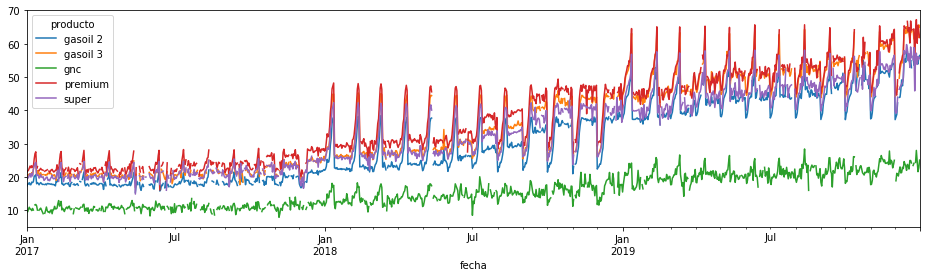

In [37]:
precios.plot()

Por alguna razón surgen unas oscilaciones inesperadas en los precios. Probablemente se requiera hacer una limpieza adicional en los datos originales para removerlas. Sin embargo, salvo por esos picos, el resto de la curva sigue valores razonables. Dado que solo estamos interesados en la tendencia general para utilizarla como indicador económico, lo que podemos hacer es tomar una mediana deslizante seguida de un promedio deslizante, para así eliminar los picos y obtener una curva suave.

In [38]:
indicador = precios.rolling(30, min_periods=1).median().rolling(30).mean().bfill()

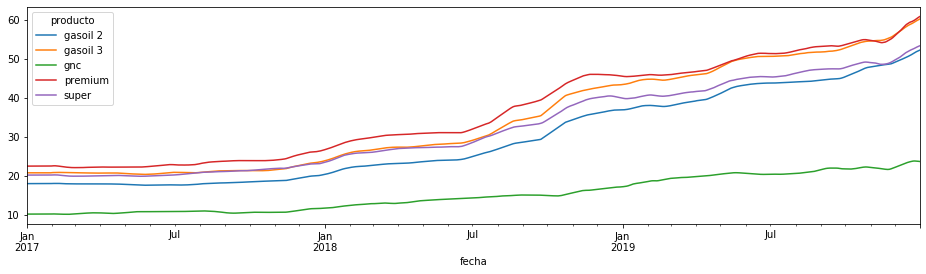

In [39]:
indicador.plot()

Eliminamos el valor del gnc ya que sigue un patrón diferente al resto.

In [40]:
indicador = indicador.drop(columns="gnc")

Podemos tomar una de las curvas como representante o tomar un promedio de todas. Vamos a optar por promediarlas.

In [42]:
indicador_promedio = indicador.mean(axis=1)

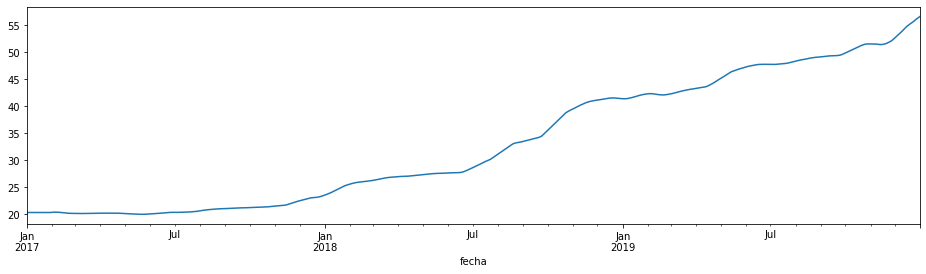

In [43]:
indicador_promedio.plot()

In [44]:
indicador_promedio.name = "indicador"
indicador_promedio = indicador_promedio.reset_index()
indicador_promedio

Guardamos el indicador.

In [436]:
indicador_promedio.to_csv("../data/indicador_económico.csv", index=False)